In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.decomposition import NMF
from sklearn.impute import KNNImputer
from sklearn.metrics.pairwise import cosine_similarity

### Data preprocessing

In [2]:
# load data
ratings = pd.read_csv("../data/ml-latest-small/ratings.csv")
movies = pd.read_csv("../data/ml-latest-small/movies.csv")
links = pd.read_csv("../data/ml-latest-small/links.csv")

In [3]:
# merge movies and links
movies_links=movies.merge(links, on='movieId')

In [4]:
# reset index of movie_links dataframe
movies_links.set_index('title',inplace=True)
movies_links

,movieId,genres,imdbId,tmdbId
title,,,,
Toy Story (1995),1,Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
Jumanji (1995),2,Adventure|Children|Fantasy,113497,8844.0
Grumpier Old Men (1995),3,Comedy|Romance,113228,15602.0
Waiting to Exhale (1995),4,Comedy|Drama|Romance,114885,31357.0
Father of the Bride Part II (1995),5,Comedy,113041,11862.0
...,...,...,...,...
Black Butler: Book of the Atlantic (2017),193581,Action|Animation|Comedy|Fantasy,5476944,432131.0
No Game No Life: Zero (2017),193583,Animation|Comedy|Fantasy,5914996,445030.0
Flint (2017),193585,Drama,6397426,479308.0


In [5]:
# merge ratings and movies dataframes to have userId movies title and movieId in one dataframe
df = ratings.merge(movies, on='movieId')
df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [6]:
# make df dataframe wide fromat and name it ratings
ratings = df.pivot_table(index='userId',columns='title',values='rating')
ratings

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [7]:
# check missing values
ratings.isna().sum()

title
'71 (2014)                                   609
'Hellboy': The Seeds of Creation (2004)      609
'Round Midnight (1986)                       608
'Salem's Lot (2004)                          609
'Til There Was You (1997)                    608
                                            ... 
eXistenZ (1999)                              588
xXx (2002)                                   586
xXx: State of the Union (2005)               605
¡Three Amigos! (1986)                        584
À nous la liberté (Freedom for Us) (1931)    609
Length: 9719, dtype: int64

In [8]:
# calculate the average item ratings
ratings.mean().sort_values(ascending=False)

title
Gena the Crocodile (1969)                  5.0
True Stories (1986)                        5.0
Cosmic Scrat-tastrophe (2015)              5.0
Love and Pigeons (1985)                    5.0
Red Sorghum (Hong gao liang) (1987)        5.0
                                          ... 
Don't Look Now (1973)                      0.5
Journey 2: The Mysterious Island (2012)    0.5
Joe Dirt 2: Beautiful Loser (2015)         0.5
Jesus Christ Vampire Hunter (2001)         0.5
Fullmetal Alchemist 2018 (2017)            0.5
Length: 9719, dtype: float64

In [9]:
# calculate the average user ratings
ratings.mean(axis=1)

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
         ...   
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Length: 610, dtype: float64

In [10]:
# calculate the number of the ratings per user
ratings.count(axis=1)

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Length: 610, dtype: int64

### Simple recommender

In [11]:
# impute missing values with the item average
def fill_na(ratings): 
    for movie in ratings.columns:
        movie_mean = ratings[movie].mean()
        ratings[movie] = ratings[movie].replace(np.nan, movie_mean)

In [14]:
def simple_recommender(query, ratings, k=10):
    '''
    Filters and recommends the top k movies for any given input query. 
    Returns a list of k movie titles.
    '''
    
    # filter out movies that the user has already seen
    ratings = ratings.drop(query.keys(),axis=1)
    
    # filter out movies that have been watched by less than 50 users
    out_filter = ratings.count() > 50
    movie_list = ratings.columns[out_filter]
    ratings = ratings[movie_list]
    
    # impute missing values with the item average
    fill_na(ratings)
   
    # ranking
    ranking = list(ratings.mean().sort_values(ascending=False).head(k).index)
    # return the top-k highest rated movie titles
    return ranking

In [15]:
query = {'Toy Story (1995)': 5, 'Jumanji (1995)': 1, 'Grumpier Old Men (1995)': 4.5 }
simple_recommender(query, ratings, k=10)

['Shawshank Redemption, The (1994)',
 'Godfather, The (1972)',
 'Fight Club (1999)',
 'Cool Hand Luke (1967)',
 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)',
 'Rear Window (1954)',
 'Godfather: Part II, The (1974)',
 'Departed, The (2006)',
 'Goodfellas (1990)',
 'Casablanca (1942)']

### Non-negative matrix factorization (NMF) based recommender

#### Fill the missing values

In [15]:
# fill missing values with KNNimputer
knn_imputer = KNNImputer(n_neighbors=10)

In [16]:
Ratings = pd.DataFrame(data=knn_imputer.fit_transform(ratings),
            index=users_id,
            columns=movies)
Ratings

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
1,4.0,4.0,3.5,5.0,4.0,1.5,3.75,3.0,3.90,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.85,3.05,2.0,4.00,1.0
2,4.0,4.0,3.5,5.0,4.0,1.5,3.05,3.0,3.70,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,4.10,2.95,2.0,3.30,1.0
3,4.0,4.0,3.5,5.0,4.0,1.5,3.00,3.0,3.00,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.75,2.60,2.0,2.90,1.0
4,4.0,4.0,3.5,5.0,4.0,1.5,3.10,3.0,3.55,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.45,2.65,2.0,3.10,1.0
5,4.0,4.0,3.5,5.0,4.0,1.5,3.20,3.0,3.40,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.85,2.50,2.0,3.30,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,4.0,4.0,3.5,5.0,4.0,1.5,2.95,3.0,4.20,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.85,3.15,2.0,3.25,1.0
607,4.0,4.0,3.5,5.0,4.0,1.5,3.35,3.0,4.05,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,4.10,3.05,2.0,3.40,1.0
608,4.0,4.0,3.5,5.0,4.0,1.5,2.55,3.0,3.60,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,4.50,3.50,2.0,2.85,1.0
609,4.0,4.0,3.5,5.0,4.0,1.5,3.10,3.0,3.35,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.80,3.05,2.0,3.10,1.0


#### Build and optimize an NMF model

In [17]:
# optimze nmf model with respect to number of components
components = [20,30,40,50,60,70,80,90,100]
error = []
for n in components:
    nmf_model = NMF(n_components=n,init='nndsvda',max_iter=3000)
    nmf_model.fit(Ratings)
    er = nmf_model.reconstruction_err_
    error.append(er)

Text(0, 0.5, 'error')

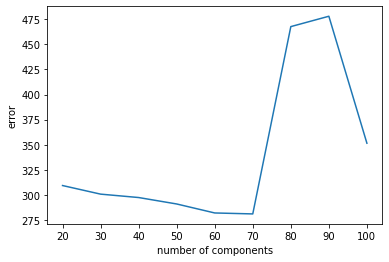

In [18]:
plt.plot(components, error)
plt.xlabel('number of components')
plt.ylabel('error')

#### Build an optimized NMF model

In [19]:
nmf_model = NMF(n_components=60,init='nndsvda',max_iter=3000)

In [20]:
nmf_model.fit(Ratings)

NMF(init='nndsvda', max_iter=3000, n_components=60)

In [21]:
Q_matrix = nmf_model.components_  # movie-genre matrix
P_matrix = nmf_model.transform(Ratings)  # user-genre matrix

In [22]:
print(nmf_model.reconstruction_err_) #reconstruction error

288.58883623347816


#### Save model 

In [25]:
binary = pickle.dumps(nmf_model)
file = open('./models/nmf_model.bin',mode="wb")
file.write(binary)
file.close()

#### Run model

In [26]:
def nmf_recommender(query, ratings, k=5):
    '''recommender based on negative matrix factorization
    '''
    
    users_id = ratings.index.to_list() 
    movies = ratings.columns.to_list()
    
    # load model
    file = open('./models/nmf_model.bin',mode="rb")
    binary = file.read()
    file.close()
    nmf_model = pickle.loads(binary)
    
    # create Q matrix (movie-genre)
    Q_matrix = nmf_model.components_
    
    # create P matrix 
    new_user_ratings = pd.DataFrame(data=query,
                                columns=movies,
                                 index = ['1000'])
    
    ### impute query
    query_imputed = new_user_ratings.fillna(0)
    P_new_user_matrix = nmf_model.transform(query_imputed)
    
    # compute recunstructed ratings for new user
    Reconstructed_new_user_ratings = pd.DataFrame(data=np.dot(P_new_user_matrix,Q_matrix),
                                              columns=movies,
                                              index=['1000'])
    # Filter out the movie that the user has rated
    Reconstructed_new_user_ratings.drop(query.keys(),axis=1,inplace=True)
    
    # get the K top movies
    topK = Reconstructed_new_user_ratings.sort_values(['1000'],
                                                axis=1, ascending=False).T.index.to_list()[:k]
    
    return topK
    
    

#### Get recommendations

In [27]:
query = {'Toy Story (1995)': 4, 'Jumanji (1995)': 2, 'Grumpier Old Men (1995)': 4.5 }

In [28]:
top = nmf_recommender(query, ratings, k=5)
top

['Nutty Professor, The (1996)',
 'Independence Day (a.k.a. ID4) (1996)',
 'Twister (1996)',
 'Phenomenon (1996)',
 'Babe (1995)']

### Cosine similarity based recommender

In [9]:
# load data
ratings = pd.read_csv("./data/ml-latest-small/ratings.csv",index_col=0)
movies = pd.read_csv("./data/ml-latest-small/movies.csv",index_col=0)

#### Run Model

In [4]:
def query_title_to_id(query_title,movies):
    '''
    Get query dictionary with movie title as keys and return the query in dictionary with movie id as keys
    '''
    movies_title = list(query_title.keys())
    movies_id = movies.reset_index().set_index('title').loc[movies_title]['movieId'].to_list()
    query_id = dict(zip(movies_id, list(query_title.values())))
    
    return query_id

In [10]:
def user_similarity_recommender(query_title, movies,ratings, k=5):
    '''
    recommender based on cosine similarity
    '''
    
    ratings = ratings.pivot_table(index='userId',columns='movieId',values='rating')
    
    users_id = ratings.index.to_list() 
    
    
    movies_id = ratings.columns.to_list()
    
    query_id = query_title_to_id(query_title,movies)
    
    new_user_rating = pd.DataFrame(data=query_id,columns=movies_id,index = ['611'])
    new_ratings=pd.concat([ratings,new_user_rating])
    
    new_ratings_imputed = new_ratings.fillna(0)
    
    cs_table = pd.DataFrame(cosine_similarity(new_ratings_imputed))
    
    top5_user = cs_table.loc[610].sort_values(ascending=False).index[1:6]

    unseen_mask = new_user_rating.loc['611'].isna()
    unseen_movies = ratings.T[unseen_mask].index
    
    pred_ratings_list = []
    pred_ratings = 0
    for movie in unseen_movies:
        others_user = ratings.T.columns[~ratings.T.loc[movie].isna()]
        others_user = set(others_user)
        num = 0
        den = 0
        for user in set(top5_user).intersection(others_user):
            rat = ratings.T[user][movie]    
            sim = cs_table[610][user]
            num = num + (rat*sim)
            den = den + sim + 0.000001
            pred_ratings = num/den


        pred_ratings_list.append((movie, pred_ratings ))
        pred_ratings = 0


    pred_ratings_list
    pred_ratings_list_sorted = sorted(pred_ratings_list,
                                      key=lambda tup: tup[1],
                                      reverse=True)
    
    pred_ratings_list_sorted_moviesId = [movie[0] for movie in pred_ratings_list_sorted[0:k]]

    
    topK = movies.loc[pred_ratings_list_sorted_moviesId]['title'].to_list()

    
    return topK
    

#### Get recommendations

In [11]:
query_title = {'Toy Story (1995)': 2, 'Jumanji (1995)': 4, 'Grumpier Old Men (1995)': 4.5 }
user_similarity_recommender(query_title, movies,ratings, k=5)

['Living in Oblivion (1995)',
 'Delicatessen (1991)',
 'Fantasia (1940)',
 'Wag the Dog (1997)',
 "Bug's Life, A (1998)"]